[Reference](https://medium.com/@yoloshe302/mastering-customer-behaviors-with-pythons-network-diagrams-a9efa3d191eb)

In [1]:
# import required libraries
import random  
import string  
import pandas as pd  
from datetime import datetime, timedelta 

def generate_random_dataset(num_customers, num_products, num_transactions):
    """Generate a random dataset containing customer, product, and transaction information."""
    
    # generate a list of unique customer IDs
    customers = [f'CUST{str(i).zfill(4)}' for i in range(1, num_customers+1)]
    
    # generate a list of unique product IDs
    products = [f'PROD{str(i).zfill(4)}' for i in range(1, num_products+1)]
    
    # create an empty list to store transaction information
    transactions = []
    
    # loop over the specified number of transactions
    for i in range(num_transactions):
        
        # generate a unique transaction ID
        transaction_id = f'TRAN{str(i).zfill(6)}'
        
        # randomly select a customer ID from the list of unique customer IDs
        customer_id = random.choice(customers)
        
        # randomly select a product ID from the list of unique product IDs
        product_id = random.choice(products)
        
        # generate a random transaction date within the last year
        transaction_date = datetime.now() - timedelta(days=random.randint(0, 365))
        
        # generate a random transaction amount between $10 and $1000
        transaction_amount = round(random.uniform(10.0, 1000.0), 2)
        
        # add the transaction information to the list of transactions
        transactions.append({
            'transaction_id': transaction_id,
            'customer_id': customer_id,
            'product_id': product_id,
            'transaction_date': transaction_date,
            'transaction_amount': transaction_amount
        })
    
    # return the list of transactions
    return transactions

# generate a random dataset with 100 customers, 50 products, and 1000 transactions
transactions = generate_random_dataset(100, 50, 1000)

# convert the list of transactions to a Pandas DataFrame
df = pd.DataFrame(transactions)

# print the first 5 rows of the DataFrame
print(df.head())

  transaction_id customer_id product_id           transaction_date  \
0     TRAN000000    CUST0073   PROD0002 2022-05-04 01:07:05.394032   
1     TRAN000001    CUST0023   PROD0045 2022-06-12 01:07:05.394072   
2     TRAN000002    CUST0026   PROD0025 2022-06-20 01:07:05.394111   
3     TRAN000003    CUST0051   PROD0044 2022-06-18 01:07:05.394121   
4     TRAN000004    CUST0036   PROD0029 2022-07-15 01:07:05.394130   

   transaction_amount  
0              505.13  
1              666.57  
2               54.70  
3              891.85  
4              109.08  


In [4]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

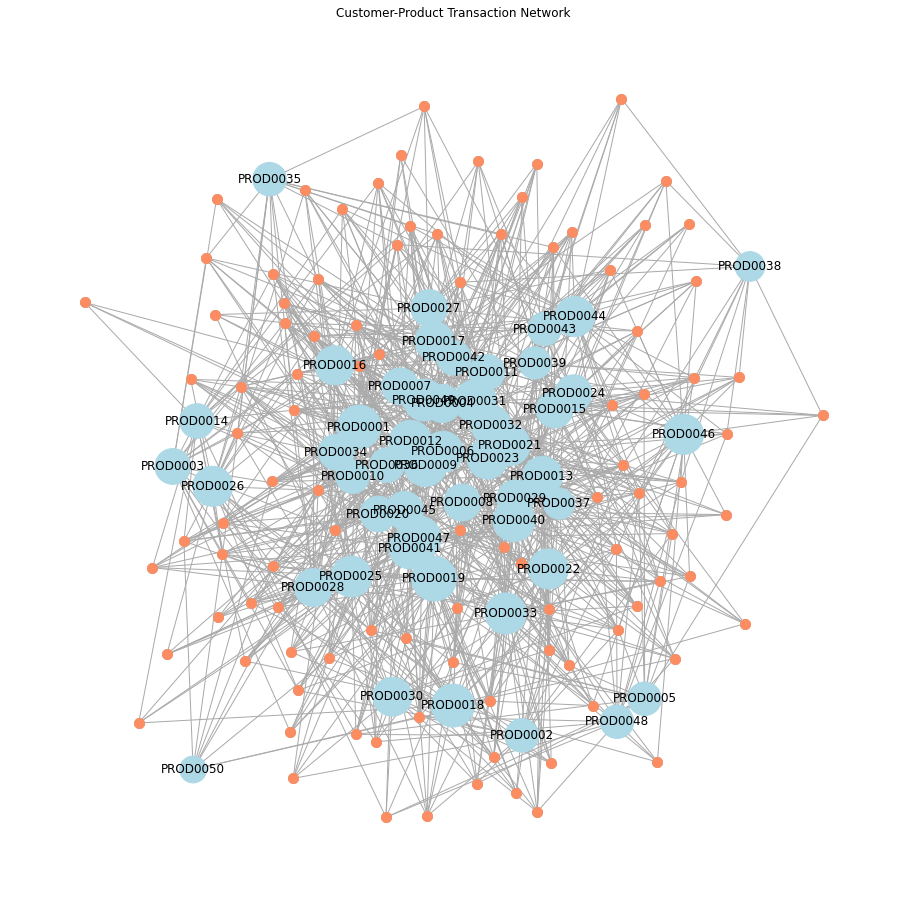

In [6]:
plt.figure(figsize=(16, 16))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='customer_id', target='product_id') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in df.product_id.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df.product_id.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in df.customer_id.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df.customer_id.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Customer-Product Transaction Network")

# 5. Tell matplotlib to show it
plt.show()

In [7]:
import plotly.graph_objs as go
import networkx as nx
import pandas as pd


# Create a graph from the dataset
g = nx.from_pandas_edgelist(df, source='customer_id', target='product_id')

# Create a layout for the graph
pos = nx.spring_layout(g)

# Define node colors and sizes
node_colors = ['blue' if node in df['customer_id'].values else 'orange' for node in g.nodes()]
node_sizes = [15 if node in df['customer_id'].values else 50 for node in g.nodes()]

# Define the edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Add the edge coordinates to the trace
for edge in g.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Define the node traces
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_colors,
        size=node_sizes,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Add the node coordinates and text to the trace
for node in g.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    if node in df['customer_id'].values:
        node_trace['text'] += tuple([f"Customer {node}"])
    else:
        node_trace['text'] += tuple([f"Product {node}"])

# Define the figure layout
fig_layout = go.Layout(
    title='Customer-Product Network Graph',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=800,
    height=800)

# Create the figure object
fig = go.Figure(data=[edge_trace, node_trace], layout=fig_layout)

# Show the figure
fig.show()